In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in all the validation_results.log files from the different experiments
no_grad_clipping = pd.read_csv('./none/validation_results.log')
grad_clip_0p1 = pd.read_csv('./grad_clip_0p1/validation_results.log')
grad_clip_1p0 = pd.read_csv('./grad_clip_1p0/validation_results.log')

In [3]:
def ema_smooth(x, alpha=0.2):
    smoothed = []
    last = x[0]
    for v in x:
        last = alpha * v + (1 - alpha) * last
        smoothed.append(last)
    return smoothed

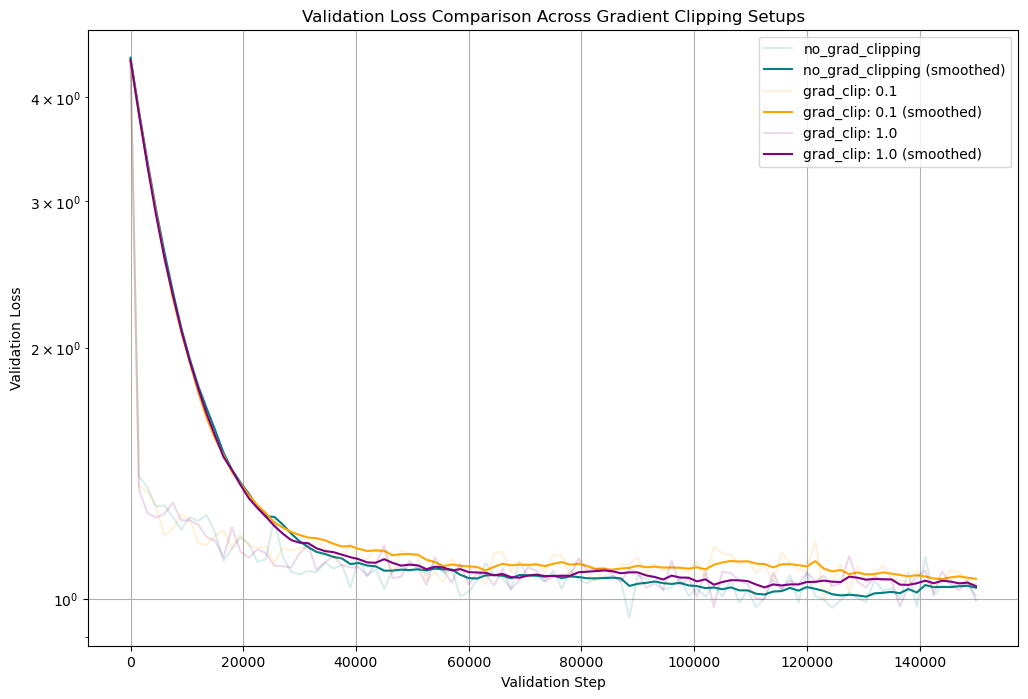

In [4]:
# Plotting all the validation loss curves for comparison
# Use vaLidation step as x-axis and validation loss as y-axis
plt.figure(figsize=(12, 8))

plt.plot(no_grad_clipping['step'], no_grad_clipping[' val_loss'], label='no_grad_clipping', alpha=0.15, color='teal')
plt.plot(no_grad_clipping['step'], ema_smooth(no_grad_clipping[' val_loss']), label='no_grad_clipping (smoothed)', color='teal')

plt.plot(grad_clip_0p1['step'], grad_clip_0p1[' val_loss'], label='grad_clip: 0.1', alpha=0.15, color='orange')
plt.plot(grad_clip_0p1['step'], ema_smooth(grad_clip_0p1[' val_loss']), label='grad_clip: 0.1 (smoothed)', color='orange')

plt.plot(grad_clip_1p0['step'], grad_clip_1p0[' val_loss'], label='grad_clip: 1.0', alpha=0.15, color='purple')
plt.plot(grad_clip_1p0['step'], ema_smooth(grad_clip_1p0[' val_loss']), label='grad_clip: 1.0 (smoothed)', color='purple')

plt.yscale('log')
plt.xlabel('Validation Step')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison Across Gradient Clipping Setups')
plt.legend()
plt.grid()
plt.show()

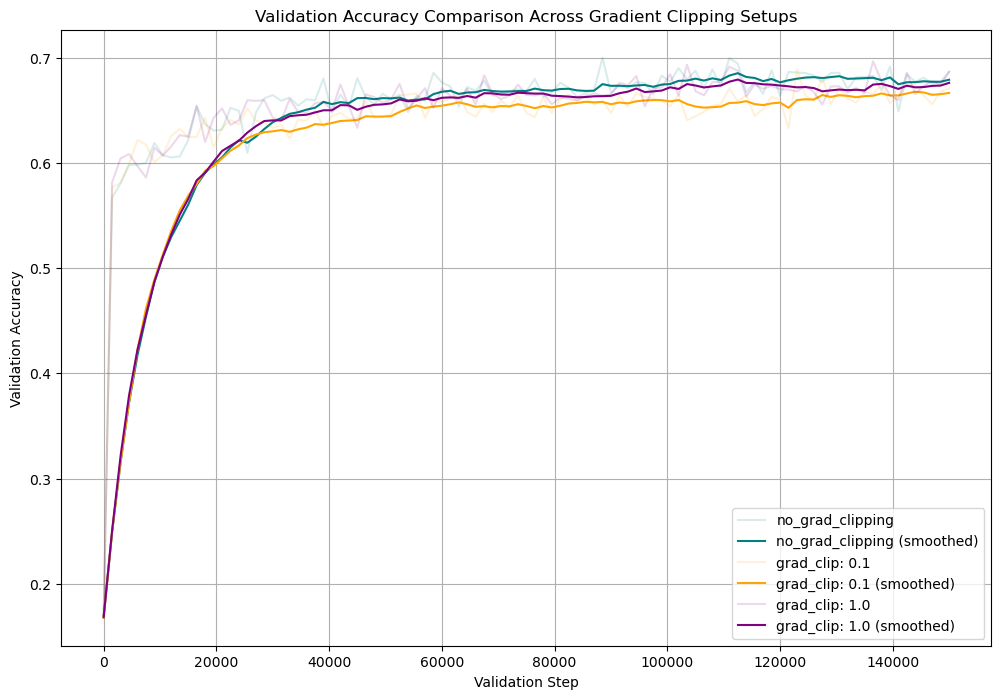

In [5]:
# Plotting all the validation accuracy curves for comparison
plt.figure(figsize=(12, 8))
plt.plot(no_grad_clipping['step'], no_grad_clipping[' val_acc'], label='no_grad_clipping', alpha=0.15, color='teal')
plt.plot(no_grad_clipping['step'], ema_smooth(no_grad_clipping[' val_acc']), label='no_grad_clipping (smoothed)', color='teal')

plt.plot(grad_clip_0p1['step'], grad_clip_0p1[' val_acc'], label='grad_clip: 0.1', alpha=0.15, color='orange')
plt.plot(grad_clip_0p1['step'], ema_smooth(grad_clip_0p1[' val_acc']), label='grad_clip: 0.1 (smoothed)', color='orange')

plt.plot(grad_clip_1p0['step'], grad_clip_1p0[' val_acc'], label='grad_clip: 1.0', alpha=0.15, color='purple')
plt.plot(grad_clip_1p0['step'], ema_smooth(grad_clip_1p0[' val_acc']), label='grad_clip: 1.0 (smoothed)', color='purple')

plt.xlabel('Validation Step')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison Across Gradient Clipping Setups')
plt.legend()
plt.grid()
plt.show()

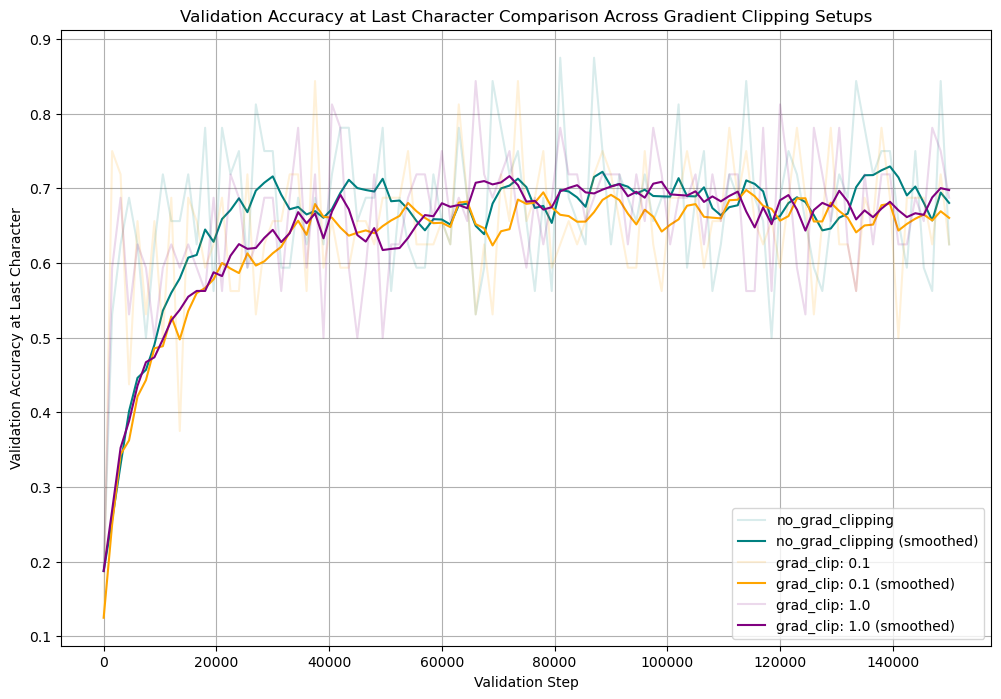

In [6]:
# Plotting all the validation accuracy at the last character curves for comparison
plt.figure(figsize=(12, 8))
plt.plot(no_grad_clipping['step'], no_grad_clipping[' last_char_val_acc'], label='no_grad_clipping', alpha=0.15, color='teal')
plt.plot(no_grad_clipping['step'], ema_smooth(no_grad_clipping[' last_char_val_acc']), label='no_grad_clipping (smoothed)', color='teal')

plt.plot(grad_clip_0p1['step'], grad_clip_0p1[' last_char_val_acc'], label='grad_clip: 0.1', alpha=0.15, color='orange')
plt.plot(grad_clip_0p1['step'], ema_smooth(grad_clip_0p1[' last_char_val_acc']), label='grad_clip: 0.1 (smoothed)', color='orange')

plt.plot(grad_clip_1p0['step'], grad_clip_1p0[' last_char_val_acc'], label='grad_clip: 1.0', alpha=0.15, color='purple')
plt.plot(grad_clip_1p0['step'], ema_smooth(grad_clip_1p0[' last_char_val_acc']), label='grad_clip: 1.0 (smoothed)', color='purple')

plt.xlabel('Validation Step')
plt.ylabel('Validation Accuracy at Last Character')
plt.title('Validation Accuracy at Last Character Comparison Across Gradient Clipping Setups')
plt.legend()
plt.grid()
plt.show()